# Computer Vision in PyTorch

Computer vision is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog (binary classification).

Or whether a photo is of a cat, dog or chicken (multi-class classification).

Or identifying where a car appears in a video frame (object detection).

Or figuring out where different objects in an image can be separated (panoptic segmentation).

### What we cover?
#### 0. Computer Vision Libraries in PyTorch
#### 1. Load Data
#### 2. Prepare Data


##### The torch.utils.data.Dataset and torch.utils.data.DataLoader classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.




In [ ]:
# Import torch vision
import torch
import math
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import requests
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import requests
from pathlib import Path
from helper_functions import accuracy_fn # importing the accuracy function
from timeit import default_timer as timer
from tqdm.auto import tqdm

print(f"PyTorch Version:  {torch.__version__} | torch version: {torchvision.__version__}")

PyTorch Version:  2.6.0+cu124 | torch version: 0.21.0+cu124


**torch — core PyTorch**

**torchvision — main vision package**

 **datasets — built-in datasets**

 **models — pretrained model architectures**

 **transforms — image preprocessing**

 **Dataset — base class for datasets**

 **DataLoader — batching and loading databold**

In [ ]:
# Setting the see and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()


In [ ]:
print("1. GETTING A DATASET  EMNIST")

# Transform | can add resize,normalize, flips and other data augmentation techniques here
transform = transforms.Compose([transforms.ToTensor()]) # since transform is just a container
print("transformed", transform.transforms)


print("=== LETS UNDERSTAND THE BUCN OF COMPUTER VISION DATASETS STORED IN TORCHVISION.DATASETS ===")
print("1. root: str mean which folder to download the load to")
print("2. train: bool want to train or test split?")
print("3. download: should the data to be downloaded?")
print("4. Apply transformation using torchvision.transforms and target_transform to transform the targets (lables)")


# download the emnist balanced split(digits+letters) online
train_dataset = datasets.EMNIST(root="./data", split="balanced", train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root="./data", split="balanced", train=False, download=True, transform=transform)

train_data = train_dataset
test_data = test_dataset

print(f"EMNIST dataset downloaded and loaded!!")
print(f"Number of training sample: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

1. GETTING A DATASET  EMNIST
transformed [ToTensor()]
=== LETS UNDERSTAND THE BUCN OF COMPUTER VISION DATASETS STORED IN TORCHVISION.DATASETS ===
1. root: str mean which folder to download the load to
2. train: bool want to train or test split?
3. download: should the data to be downloaded?
4. Apply transformation using torchvision.transforms and target_transform to transform the targets (lables)


100%|██████████| 562M/562M [09:56<00:00, 942kB/s]


EMNIST dataset downloaded and loaded!!
Number of training sample: 112800
Number of test samples: 18800


image 0 shape: torch.Size([1, 28, 28]) | label: 45


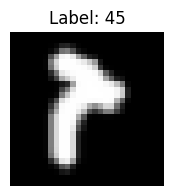

image 1 shape: torch.Size([1, 28, 28]) | label: 36


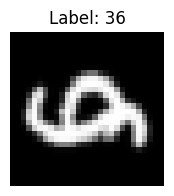

image 2 shape: torch.Size([1, 28, 28]) | label: 43


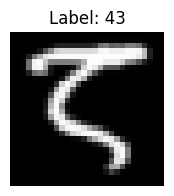

image 3 shape: torch.Size([1, 28, 28]) | label: 15


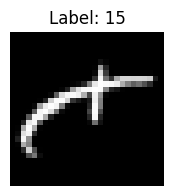

image 4 shape: torch.Size([1, 28, 28]) | label: 4


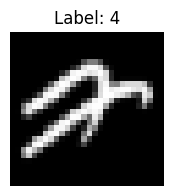

IMAGE SHAPE ---> C, H, W torch.Size([1, 28, 28])
[color_channels=1, height=28, width=28]


In [ ]:
## viewing the training sample
image, label = train_dataset[5]
# print(image, label)
for i in range(5):
  image, label = train_dataset[i]
  print(f"image {i} shape: {image.shape} | label: {label}")

  plt.figure(figsize=(2,2))

  # image is a tensor of shape(1, 28,28) we need to sequeze to (28,28) for plotting
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(f"Label: {label}")
  plt.axis("off")
  plt.show()


# checking the iamge shape
print("IMAGE SHAPE ---> C, H, W", image.shape)
print("[color_channels=1, height=28, width=28]")


In [ ]:
# EMNIST balanced mapping of labels (0-46) to characters:
num_images = 10
cols = 5
rows = math.ceil(num_images / cols)

for i in range(num_images):
    image, label = train_dataset[i]
    img = image.squeeze().numpy()
    img_rgb = np.stack([img]*3, axis=2)

    plt.subplot(rows, cols, i+1)
    plt.imshow(img_rgb)
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.tight_layout()  # Adjust spacing
plt.show()

In [ ]:
# Load the label mapping
# EMNIST balanced classes: 0-9 digits, A-Z uppercase, a-z lowercase (in total 47 classes)
# The actual EMNIST balanced mapping includes digits + letters but skips some lowercase letters
# Here's a safe approximation including digits, uppercase A-Z, and common lowercase letters present in EMNIST balanced:

label_to_char = {
    # 0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    # 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    # 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    # 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    # 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z',
    # 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'
}

# Now plot first 5 images with correct labels
plt.figure(figsize=(12, 3))

for i in range(5):
    image, label = train_dataset[i]
    img = image.squeeze().numpy()
    img_rgb = np.stack([img]*3, axis=2)

    plt.subplot(1, 5, i+1)
    plt.imshow(img_rgb)
    # plt.title(f"Label: {label_to_char[label]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

print("# How many samples are there? ")
print(f"Number of training samples: {len(train_data)}"),
print(f"Number of test samples: {len(test_data)}"),
print(len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets))

class_names = train_data.classes
print(class_names)

# DataLoader in PyTorch

torch.utils.data.DataLoader wraps your Dataset and splits it into mini-batches.

We can shuffle the data each epoch by setting shuffle=True.

The batch_size parameter controls how many samples per batch.



In [ ]:
## DATA LOADER IN PYTORCH
print("DATA LOADER IN PYTORCH")

# BATCH SIZE
BATCH_SIZE = 32

# TURN THE DATASETS INTO ITERABLES(BATCHES)
train_dataloader = DataLoader(
    train_data, # make it iterable
    batch_size = BATCH_SIZE, # how many samples or images per batch?
    shuffle = True # shuffle data for every epoch
    )

test_dataloader = DataLoader(
    train_data, # make it iterable
    batch_size = BATCH_SIZE, # how many samples or images per batch?
    shuffle = False # shuffle data for every epoch
    )

# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print("train_features_batch.shape | ", "train_labels_batch.shape")
print(train_features_batch.shape," | ",  train_labels_batch.shape)

# mannual seed
torch.manual_seed(42)

# See classes
class_names = train_data.classes
print(class_names)


random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model O: Build a baseline Model
A baseline model is one of the simplest models we can imagine.

We use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

nn.Flatten() layer to flatten the image features complex dimensions data, that means we are compressing tensor into a single vector.



In [ ]:
# flatten layer
flatten_model = nn.Flatten()

# single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) # perform forward pass

# print the shapes
print(f"shape before flattening: {x.shape} --> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} --> [color_channels, height** width]")


### Model Creation for Alphanumeric NN
nn.Linear() layers like their input to be in the form of feature vectors
#### AlphaNumericNN is baseline model

In [ ]:
class AlphaNumericNN(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):  # type hinting input_shape: int means use int nothing else
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # NN input in vector form like [color_channels, height*width]
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

  def forward(self, x):
    return self.layer_stack(x)



Wonderful!

We've got a baseline model class we can use, now let's instantiate a model.

with parametersModel Setup Summary:
input_shape = 784 → 28×28 image flattened.

hidden_units = 10 → 10 neurons in the hidden layer.

output_shape = len(class_names) → One output per class (e.g., 10 for digits 0–9).




In [ ]:
torch.manual_seed(42)

# model setup with input parameters
model_0 = AlphaNumericNN(input_shape=784,  # one for every pixel (28x28)
                         hidden_units=10, # units in the hidden layer
                         output_shape=len(class_names)
                         )
c = model_0.to("cpu")
print(c)

### Setup Loss, Optimizer and Evaluation Metrics
- using helper functions
- can use evaluation metrics from the TorchMetrics Package


In [ ]:
# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # also called cirterion or cost
print(loss_fn)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1) #Learning rate =0.1
print(optimizer)

CrossEntropyLoss()


NameError: name 'model_0' is not defined

## Creating a function to time our experiments
Loss Functions and optimizer ready--->start training --> measure training time?? using built in function from the python module

In [ ]:
def print_train_time(start: float, end: float, device: torch.device = None):
  """"
  Prints the difference between start and end time.
      Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
  """
  total time = end- start
  print(f"Train time on {device}: {total_time:3f} seconds")
  return total_time



SyntaxError: invalid syntax (<ipython-input-2-b666a27df3ee>, line 12)

### Creating a training loop and training model on baatches of data

- Data batches contained within Dataloaders, train_dataloader and test_dataloader for training and testing data splits repectively
- a batchSIZE of X an y if using 32 batch size means 32 sample of iamges and targets
- And since we're computing on batches of data, our loss and evaluation metrics will be calculated per batch rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.


Let's step through it:

-Loop through epochs.
- Loop through training batches, perform training steps, calculate the train loss per batch.
- Loop through testing batches, perform testing steps, calculate the test loss per batch.
- Print out what's happening.
- Time it all (for fun).

In [ ]:
epochs = 15

# training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"🌀 Epoch: {epoch} ----- ")

  # training
  train_loss = 0

  # loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward Pass
    y_pred = model_0(X)

    # 2. Caculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss  += loss # accumulatively add up to the loss per epoch

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss Backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples")

    # average loss per batch per epoch
    train_loss /= len(train_dataloader)

    ## testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
      for X, y in test_dataloader:
        # 1. Forward pass
        test_pred = model_0(X)

        # 2. Calculate loss accumulation
        test_loss += loss_fn(test_pred, y)

        # 3. calculate accuracy preds need to be same as y_true
        test_acc += accuracy_fn(y_true=y, y_pred = test_pred.argmax(dim=1))

      # test loss
      test_loss /= len(test_dataloader)

      test_acc /= len(test_dataloader)

      ### printing details
      print(f"Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_train_model_0 = print_train_time(start=train_time_start_on_cpu,
                                             end=train_time_end_on_cpu,
                                             device=str(next(model_0.parameters()).device))


  0%|          | 0/15 [00:00<?, ?it/s]

🌀 Epoch: 0 ----- 
Looked at 0/ 112800 samples
Train Loss: 0.00092 | Test Loss: 3.03259 | Test Acc: 20.58865
Train Loss: 0.00097 | Test Loss: 3.03069 | Test Acc: 20.47074
Train Loss: 0.00083 | Test Loss: 3.01873 | Test Acc: 20.41046
Train Loss: 0.00086 | Test Loss: 3.01465 | Test Acc: 20.23493
Train Loss: 0.00085 | Test Loss: 3.00203 | Test Acc: 20.49645
Train Loss: 0.00087 | Test Loss: 2.99219 | Test Acc: 20.04433
Train Loss: 0.00079 | Test Loss: 2.98808 | Test Acc: 20.01064
Train Loss: 0.00085 | Test Loss: 2.98204 | Test Acc: 20.24202
Train Loss: 0.00076 | Test Loss: 2.97139 | Test Acc: 21.66135
Train Loss: 0.00082 | Test Loss: 2.95896 | Test Acc: 21.55851
Train Loss: 0.00083 | Test Loss: 2.95283 | Test Acc: 22.18351
Train Loss: 0.00081 | Test Loss: 2.95000 | Test Acc: 21.65071
Train Loss: 0.00080 | Test Loss: 2.95512 | Test Acc: 21.59840
Train Loss: 0.00087 | Test Loss: 2.94821 | Test Acc: 21.30762
Train Loss: 0.00089 | Test Loss: 2.92631 | Test Acc: 22.05408
Train Loss: 0.00089 | Te

## Make Predictions and get Model 0 results

- function that takes trained model , a dataloader, loss function and accuracy function.
- and we use function to make predictions and evaluate those predictions using the loss function and accuracy function.

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
      for X, y in data_loader:
        # making predictions with the model
        y_pred = model(X)

        # loss and acc. collections per batch
        loss = loss + loss_fn(y_pred, y)
        acc = acc + accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

      # Scale loss and acc to find the average loss/acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

      return {
         "model_name": model.__classs__.__name__,
         "model_loss": loss.item(),
         "model_acc": acc   }

# calculate the model result on the test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results
print(model_0_results)